11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8532 - loss: 0.5149 - val_accuracy: 0.9733 - val_loss: 0.0972
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9745 - loss: 0.0913 - val_accuracy: 0.9798 - val_loss: 0.0658
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9823 - loss: 0.0576 - val_accuracy: 0.9821 - val_loss: 0.0536
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9873 - loss: 0.0416 - val_accuracy: 0.9838 - val_loss: 0.0460
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9903 - loss: 0.0339 - val_accuracy: 0.9857 - val_loss: 0.0440
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9923 - loss: 0.0253 - val_accuracy: 0.9843 - val_loss: 0.0473
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9942 - loss: 0.0202 - val_accuracy: 0.9857 - val_loss: 0.0447
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9948 - loss: 0.0171 - val_accuracy: 0.

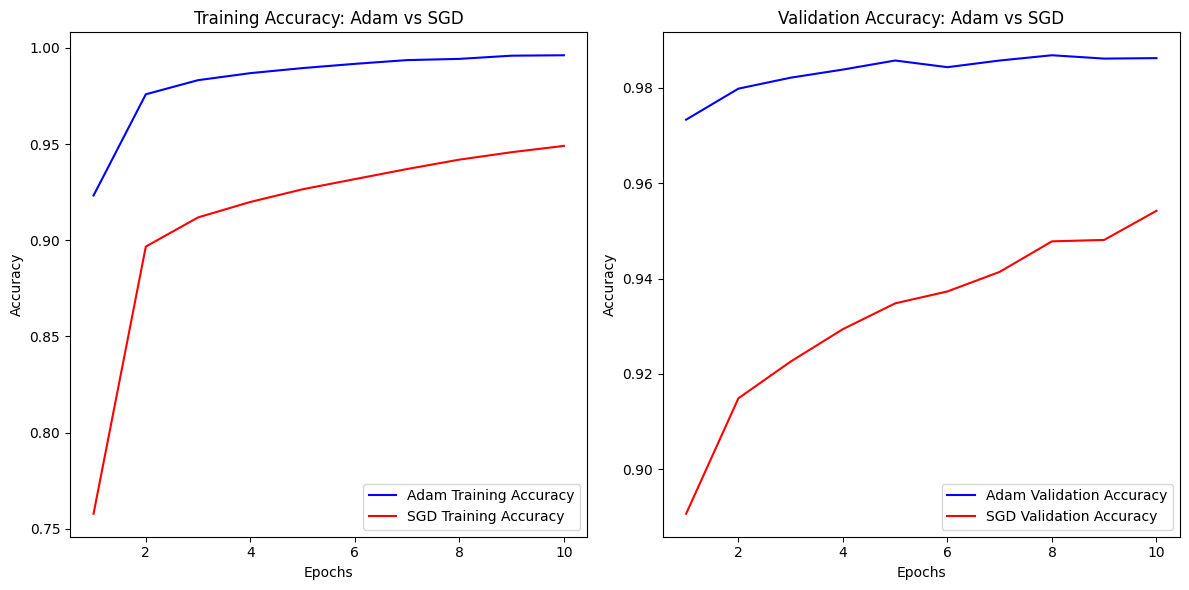

In [1]:
# Step 1: Import Required Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Step 2: Load and Preprocess the MNIST Dataset
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Reshape data to fit the model (add a channel dimension for grayscale images)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Convert labels to one-hot encoded vectors
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Step 3: Define a Simple CNN Model
def create_model():
    """
    Create a simple CNN model for MNIST classification.
    """
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')  # Output layer for 10 classes
    ])
    return model

# Step 4: Train the Model with Adam Optimizer
# Create and compile the model with Adam optimizer
model_adam = create_model()
model_adam.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

# Train the model
history_adam = model_adam.fit(x_train, y_train,
                              epochs=10,
                              batch_size=128,
                              validation_data=(x_test, y_test))

# Step 5: Train the Model with SGD Optimizer
# Create and compile the model with SGD optimizer
model_sgd = create_model()
model_sgd.compile(optimizer='sgd',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model
history_sgd = model_sgd.fit(x_train, y_train,
                            epochs=10,
                            batch_size=128,
                            validation_data=(x_test, y_test))

# Step 6: Plot Training and Validation Accuracy Trends
# Extract accuracy values from history
adam_train_acc = history_adam.history['accuracy']
adam_val_acc = history_adam.history['val_accuracy']
sgd_train_acc = history_sgd.history['accuracy']
sgd_val_acc = history_sgd.history['val_accuracy']

# Plot the accuracy trends
epochs = range(1, len(adam_train_acc) + 1)

plt.figure(figsize=(12, 6))

# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, adam_train_acc, 'b', label='Adam Training Accuracy')
plt.plot(epochs, sgd_train_acc, 'r', label='SGD Training Accuracy')
plt.title('Training Accuracy: Adam vs SGD')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, adam_val_acc, 'b', label='Adam Validation Accuracy')
plt.plot(epochs, sgd_val_acc, 'r', label='SGD Validation Accuracy')
plt.title('Validation Accuracy: Adam vs SGD')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

**Observations**:

Adam typically converges faster and achieves higher accuracy compared to SGD.

SGD may show slower convergence but can still achieve good accuracy with more epochs.
